<a href="https://colab.research.google.com/github/rawat999/Car_Segmentation/blob/master/Dataset_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Segmentation Challenge - Remove studio background from Car images

**Download the Carvana Dataset from Kaggle**<br>
[Carvana Image Masking Challenge](https://www.kaggle.com/c/carvana-image-masking-challenge)<br>

Carvana, a successful online used car startup, has seen opportunity to build long term trust with consumers and streamline the online buying process.

An interesting part of their innovation is a custom rotating photo studio that automatically captures and processes 16 standard images of each vehicle in their inventory. While Carvana takes high quality photos, bright reflections and cars with similar colors as the background cause automation errors, which requires a skilled photo editor to change.

**About Dataset**<br>
This dataset contains a large number of car images (as .jpg files). Each car has exactly 16 images, each one taken at different angles. Each car has a unique id and images are named according to id_01.jpg, id_02.jpg ... id_16.jpg. In addition to the images.

For the training set, you are provided a .gif file that contains the manually cutout mask for each image.

**Task**<br>
To develop an algorithm that automatically removes the photo studio background. This will allow Carvana to superimpose cars on a variety of backgrounds. You’ll be analyzing a dataset of photos, covering different vehicles with a wide variety of year, make, and model combinations.


In [1]:
# setting up directory
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"
%cd /content/

/content


Note:<br>
(1) First, download json file from your kaggle profile.<br>
**( Your Profile > Edit Profile > API section > Create New API Token).** <br>
It downloads a json file.<br>

(2) upload json file in the collab directory i.e. /content/

In [2]:
# download kaggle dataset
!chmod 600 /content/kaggle.json
!kaggle competitions download -c carvana-image-masking-challenge -f train.zip #"here -f for specific file"
!kaggle competitions download -c carvana-image-masking-challenge -f train_masks.zip  #"here -f for specific file"

 96% 389M/405M [00:04<00:00, 104MB/s] 
100% 405M/405M [00:04<00:00, 84.9MB/s]
 65% 19.0M/29.1M [00:00<00:00, 24.9MB/s]
100% 29.1M/29.1M [00:00<00:00, 64.5MB/s]


**Extract the Zip files**

In [3]:
import zipfile
zip_file = zipfile.ZipFile('/content/train.zip')
zip_file.extractall('/content/')
zip_file.close()

zip_file = zipfile.ZipFile('/content/train_masks.zip')
zip_file.extractall('/content/')
zip_file.close()

**Import important python packages**

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import shutil

**Formating the image directories and make train and validation split**

In [5]:
# set up direcotry name
os.chdir('/content/')
root_path = '/content/'
source_image_path = root_path + 'train/'
source_mask_path = root_path + 'train_masks/'

In [9]:
def make_dataset(parent_path, source_img_dir, source_mask_dir, test_ratio, maskfile_suffix='_mask.gif'):
  dataset_base_dir = 'Car/'
  os.mkdir(parent_path+dataset_base_dir)
  os.mkdir(parent_path+dataset_base_dir+'train/')
  os.mkdir(parent_path+dataset_base_dir+'train/'+'images/')
  os.mkdir(parent_path+dataset_base_dir+'train/'+'masks/')
  os.mkdir(parent_path+dataset_base_dir+'val/')
  os.mkdir(parent_path+dataset_base_dir+'val/'+'images/')
  os.mkdir(parent_path+dataset_base_dir+'val/'+'masks/')

  dataset_train_path = os.path.join(parent_path, dataset_base_dir, 'train')
  dataset_val_path = os.path.join(parent_path, dataset_base_dir, 'val')

  source_images = os.listdir(source_img_dir)

  selected_images_for_validation = random.choices(source_images, 
                                                k = int(len(source_images) * test_ratio))

  selected_images_for_training = [img for img in source_images if img not in selected_images_for_validation]

  for img in selected_images_for_training:
    shutil.copy(os.path.join(source_img_dir,img), os.path.join(dataset_train_path,'images'))
    shutil.copy(os.path.join(source_mask_dir,img[:-4]+maskfile_suffix), os.path.join(dataset_train_path,'masks'))

  for img in selected_images_for_validation:
    shutil.copy(os.path.join(source_img_dir,img), os.path.join(dataset_val_path,'images'))
    shutil.copy(os.path.join(source_mask_dir,img[:-4]+maskfile_suffix), os.path.join(dataset_val_path,'masks'))

In [8]:
#!rm -r /content/Car/

In [10]:
make_dataset(parent_path = root_path,
             source_img_dir = source_image_path,
             source_mask_dir = source_mask_path,
             test_ratio = 0.1
             )

**Summary of Dataset**

In [11]:
total_train_images = len(os.listdir('/content/Car/train/images/'))
total_train_masks = len(os.listdir('/content/Car/train/masks/'))
total_val_images = len(os.listdir('/content/Car/val/images/'))
total_val_masks = len(os.listdir('/content/Car/val/masks/'))

print("Summary: \nTotal {} training images and {} training masks.\nTotal {} validation images and {} validation masks.".format(total_train_images, 
                                                                                                                               total_train_masks,
                                                                                                                               total_val_images,
                                                                                                                               total_val_masks))

Summary: 
Total 4611 training images and 4611 training masks.
Total 477 validation images and 477 validation masks.


**Visualisation of Training Images and Masks**

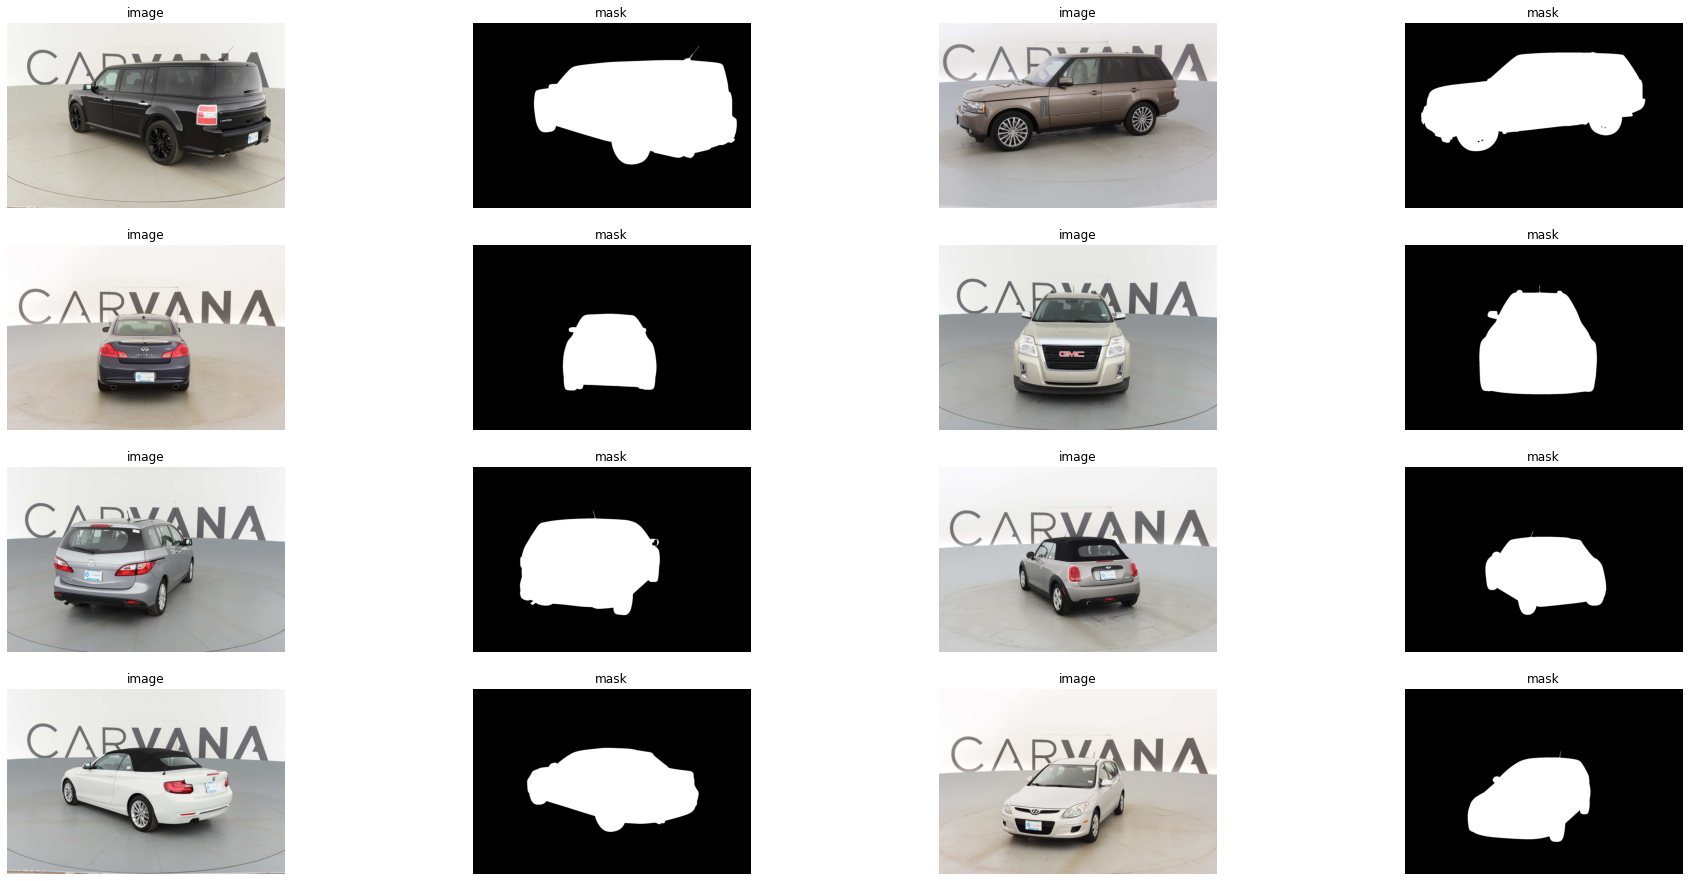

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(32, 32)

# Index for iterating over images
train_image_dir = os.path.join("/content/Car/train/images")
train_mask_dir = os.path.join("/content/Car/train/masks")

pic_index = random.choice(range(8,len(os.listdir(train_image_dir))))

car_image_names = os.listdir(train_image_dir)

car_mask_names = [img[:-4] + '_mask.gif' for img in car_image_names]

next_image_pix = [os.path.join(train_image_dir, fname) for fname in car_image_names[pic_index-8:pic_index]]
next_mask_pix = [os.path.join(train_mask_dir, fname) for fname in car_mask_names[pic_index-8:pic_index]]

for i, mask_path in zip(list(range(1,16,2)), next_mask_pix):
  next_image_pix.insert(i,mask_path)


titles = ['image', 'mask']
for i, img_path in enumerate(next_image_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(8, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title('{}'.format(titles[(i%2)]))

plt.show()

**Visualisation of Validation Images and Masks**

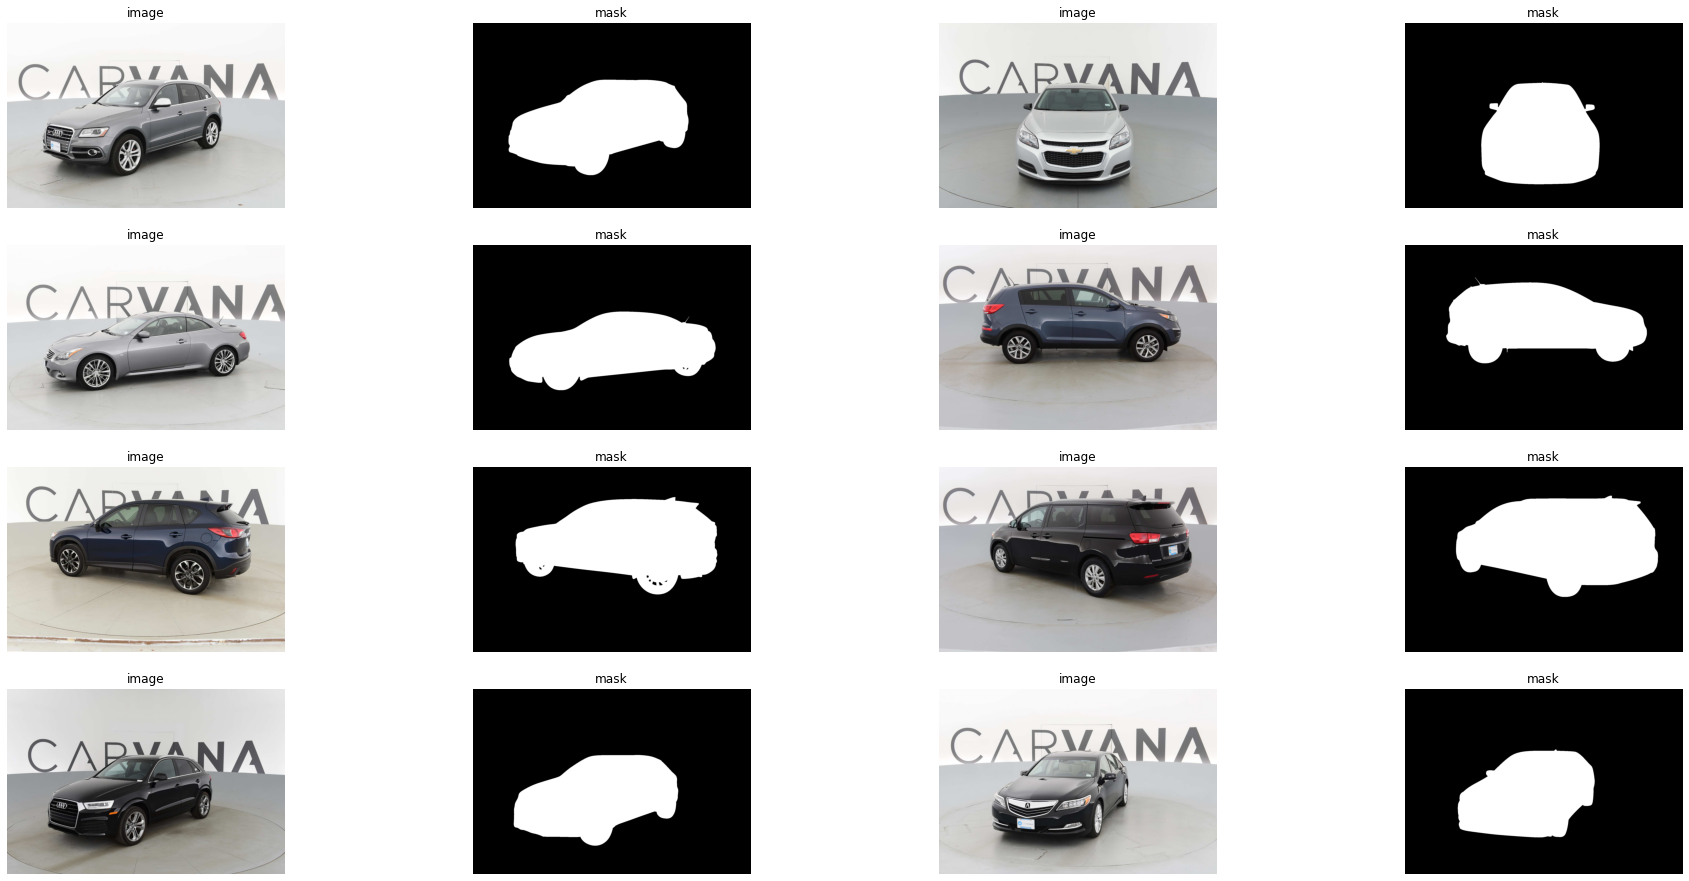

In [13]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(32, 32)

# Index for iterating over images
train_image_dir = os.path.join("/content/Car/val/images")
train_mask_dir = os.path.join("/content/Car/val/masks")

pic_index = random.choice(range(8,len(os.listdir(train_image_dir))))

car_image_names = os.listdir(train_image_dir)

car_mask_names = [img[:-4] + '_mask.gif' for img in car_image_names]

next_image_pix = [os.path.join(train_image_dir, fname) for fname in car_image_names[pic_index-8:pic_index]]
next_mask_pix = [os.path.join(train_mask_dir, fname) for fname in car_mask_names[pic_index-8:pic_index]]

for i, mask_path in zip(list(range(1,16,2)), next_mask_pix):
  next_image_pix.insert(i,mask_path)


titles = ['image', 'mask']
for i, img_path in enumerate(next_image_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(8, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title('{}'.format(titles[(i%2)]))

plt.show()

**Create zip file of whole dataset**

In [14]:
os.chdir('/content/')
shutil.make_archive('carvana_dataset', 'zip', root_dir='/content/', base_dir='Car')

'/content/carvana_dataset.zip'

**Saving zipped Dataset into Storage**

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
shutil.move('/content/carvana_dataset.zip', 
            '/content/gdrive/MyDrive/Car_Segmentation/')